# Stock Price Prediction

In [115]:
#installing keras
# pip install keras

In [2]:
#installing tensorflow
# pip install tensorflow

In [3]:
#importing the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#importing ML specific library
from sklearn.model_selection import train_test_split

#import Library used for scaling the data 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

#importing keras for neural network model 
from keras.models import Sequential
from keras.layers import Dense,LSTM , Dropout


2023-07-27 15:09:08.900808: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#importing the given dataset
df = pd.read_excel('stock_price.xlsx')
#printing the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
#printing the shape of the dataset
df.shape

(1009, 7)

In [6]:
#describing the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [7]:
#printing the datatype
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [8]:
#printing the sum of null values
df.isnull().sum()
#indicating no null value

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Performing the Exploratory Data Analysis

Text(0.5, 1.0, 'Stock Close Price')

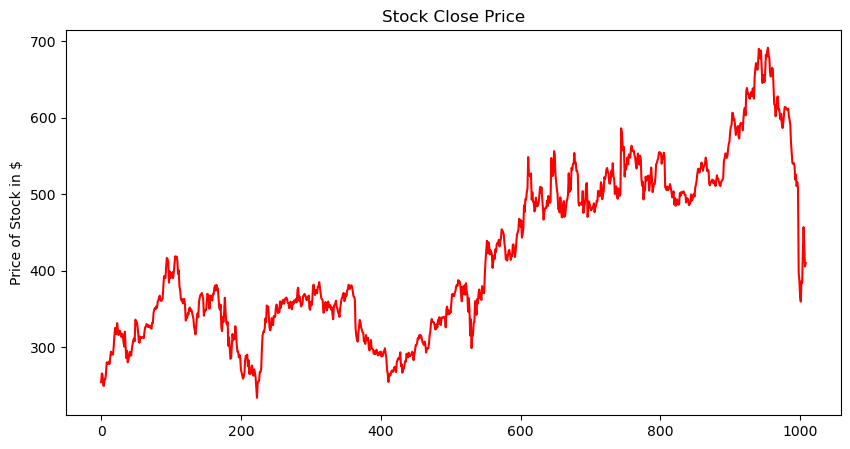

In [9]:
#Performing the analysis on Stock Close Price
plt.figure(figsize = (10,5))
plt.plot(df['Close'], color = "red")
plt.ylabel("Price of Stock in $")
plt.title("Stock Close Price")


In [65]:
#splitting the dataset into training and testing data
#considering only the stock closing price

#training data
df_train = df['Close'][0 : int(len(df) * 0.7)]
df_train = pd.DataFrame(df_train)
df_train

#testing data
df_test = pd.DataFrame(df['Close'][0 : len(df) - int( len(df) * 0.7 )])
df_test


# len(df_train) * 0.65
# df_train[0: (int(len(df)) * 0.7 )]

# df_train.iloc[705:710]

# df_train[0: (int(len(df)) * 0.7 )]
# df_train.shape

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001
...,...
298,351.140015
299,348.869995
300,359.459991
301,354.739990


In [11]:
#printing the shape of training and testing data
print("df_train_shape = " , df_train.shape)
print("df_test_shape = " , df_test.shape)

df_train_shape =  (706, 1)
df_test_shape =  (303, 1)


In [12]:
#priniting the head
df_train.head()

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [13]:
#priniting the head of test
df_test.head()

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [14]:
#scaling the dataset
#done because LSTM is sensitive to big data
#transforming the data between 0 and 1
scaler = MinMaxScaler(feature_range = (0,1))

In [15]:
df_train_new = scaler.fit_transform(df_train)
df_train_new

array([[0.06316048],
       [0.09867666],
       [0.09508165],
       [0.05026808],
       [0.04831561],
       [0.07459636],
       [0.07558802],
       [0.09954442],
       [0.14376913],
       [0.13834564],
       [0.13843861],
       [0.14615554],
       [0.13716804],
       [0.16131029],
       [0.18681626],
       [0.17581425],
       [0.17820065],
       [0.17513253],
       [0.2081693 ],
       [0.25140236],
       [0.28307559],
       [0.27049308],
       [0.25760064],
       [0.30235226],
       [0.27092691],
       [0.25412962],
       [0.2717017 ],
       [0.27027612],
       [0.26209444],
       [0.2466917 ],
       [0.25915021],
       [0.25598912],
       [0.22567952],
       [0.20782843],
       [0.26798279],
       [0.20705365],
       [0.16081441],
       [0.19050424],
       [0.14383118],
       [0.15430629],
       [0.17063873],
       [0.18622741],
       [0.17035982],
       [0.17370686],
       [0.19893391],
       [0.21628912],
       [0.23358229],
       [0.241

In [16]:
#shape of scaled array
df_train_new.shape 

(706, 1)

In [17]:
#preperation of training and testing data
X_TRAIN = []
Y_TRAIN = []
timestamp = 100 #represents how many previous data is used for the prediction of current value

#dividing df_train_new in X_TRAIN AND Y_TRAIN
for i in range(timestamp , df_train_new.shape[0]):
    X_TRAIN.append(df_train_new[i-timestamp : i , 0])
    Y_TRAIN.append(df_train_new[i , 0])


In [18]:
#printing the x_train
X_TRAIN

[array([0.06316048, 0.09867666, 0.09508165, 0.05026808, 0.04831561,
        0.07459636, 0.07558802, 0.09954442, 0.14376913, 0.13834564,
        0.13843861, 0.14615554, 0.13716804, 0.16131029, 0.18681626,
        0.17581425, 0.17820065, 0.17513253, 0.2081693 , 0.25140236,
        0.28307559, 0.27049308, 0.25760064, 0.30235226, 0.27092691,
        0.25412962, 0.2717017 , 0.27027612, 0.26209444, 0.2466917 ,
        0.25915021, 0.25598912, 0.22567952, 0.20782843, 0.26798279,
        0.20705365, 0.16081441, 0.19050424, 0.14383118, 0.15430629,
        0.17063873, 0.18622741, 0.17035982, 0.17370686, 0.19893391,
        0.21628912, 0.23358229, 0.24102022, 0.22902655, 0.31667028,
        0.31189757, 0.3062572 , 0.29097836, 0.2628382 , 0.22667117,
        0.22276632, 0.24824127, 0.24136117, 0.24353051, 0.24613378,
        0.24631972, 0.24114421, 0.26717698, 0.28629873, 0.2882512 ,
        0.29881919, 0.29664985, 0.2869185 , 0.29333374, 0.28589582,
        0.29228004, 0.28307559, 0.27985246, 0.30

In [19]:
#printing the Y_TRAIN
Y_TRAIN

[0.500635375184558,
 0.4882697378144407,
 0.5091889442966873,
 0.48544950646989693,
 0.5098398322350299,
 0.5403973229204899,
 0.5736201250551403,
 0.5632690041701214,
 0.5726283780168049,
 0.5566678168511261,
 0.5018129715524235,
 0.5163170259937069,
 0.45123505027116195,
 0.43775376527664167,
 0.40397313932979007,
 0.3941177974401169,
 0.39910746516511275,
 0.3825580577788048,
 0.39975825703006285,
 0.4004400713034406,
 0.3760188192032725,
 0.31326119975653266,
 0.32097812767418166,
 0.323860307762188,
 0.34282703947704984,
 0.3384572372819692,
 0.3627235694867841,
 0.3655437078570769,
 0.35246532368026307,
 0.35788882165714186,
 0.34707284811181216,
 0.3329407712523418,
 0.321102025161107,
 0.28673255609276804,
 0.2744599797496502,
 0.2569188284241486,
 0.2908544672406046,
 0.3227445671635343,
 0.34264109717326874,
 0.3263086544991698,
 0.3872067703304152,
 0.4050577645457649,
 0.4171754178943876,
 0.415780863012597,
 0.4248923458120366,
 0.41466512241394327,
 0.40202066456240515,
 

In [20]:
#printing the shape of lists
print("X_TRAIN : " , len(X_TRAIN))
print("Y_TRAIN : " , len(Y_TRAIN))

X_TRAIN :  606
Y_TRAIN :  606


In [67]:
#converting into numpy array
X_TRAIN = np.array(X_TRAIN)
Y_TRAIN = np.array(Y_TRAIN)


(606, 100)

In [68]:
print("X_TRAIN :" ,X_TRAIN.shape)
print("Y_TRAIN :" ,Y_TRAIN.shape)

X_TRAIN : (606, 100)
Y_TRAIN : (606,)


In [35]:
#reshaping the data
X_TRAIN.reshape(X_TRAIN.shape[0], X_TRAIN.shape[1],1 )

array([[[0.06316048],
        [0.09867666],
        [0.09508165],
        ...,
        [0.46673076],
        [0.51293897],
        [0.4850467 ]],

       [[0.09867666],
        [0.09508165],
        [0.05026808],
        ...,
        [0.51293897],
        [0.4850467 ],
        [0.50063538]],

       [[0.09508165],
        [0.05026808],
        [0.04831561],
        ...,
        [0.4850467 ],
        [0.50063538],
        [0.48826974]],

       ...,

       [[0.66123283],
        [0.68540619],
        [0.78023995],
        ...,
        [0.77156229],
        [0.75997153],
        [0.76471321]],

       [[0.68540619],
        [0.78023995],
        [0.75312246],
        ...,
        [0.75997153],
        [0.76471321],
        [0.76830823]],

       [[0.78023995],
        [0.75312246],
        [0.80555988],
        ...,
        [0.76471321],
        [0.76830823],
        [0.77723377]]])

In [22]:
#Constructing the Model of LSTM networks
#Choosing the Model
model = Sequential()

In [23]:
#units is the number of nodes
#activation function checks the activation of each node
#return seq is by default false if it is true then it passes the hidden datas
#dropout tackles and prevents the overfitting

In [40]:
model = Sequential()

#1st Layer
model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = (X_TRAIN.shape[1],1)))
model.add(Dropout(0.2))

#2nd Layer
model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

#3rd Layer
model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

#4th Layer
model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

#Dense Layer
model.add(Dense(units = 1))


In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_5 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_12 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_6 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_7 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_14 (LSTM)              (None, 120)              

In [45]:
#Compiling the model
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')
#otimizer optmizes the function
#loss prevents the loss

In [47]:
#fitting the training data into the model
mod = model.fit(X_TRAIN , Y_TRAIN , epochs = 50 , batch_size = 32 , verbose = 2)

Epoch 1/50
19/19 - 6s - loss: 0.0072 - 6s/epoch - 326ms/step
Epoch 2/50
19/19 - 6s - loss: 0.0064 - 6s/epoch - 309ms/step
Epoch 3/50
19/19 - 5s - loss: 0.0078 - 5s/epoch - 263ms/step
Epoch 4/50
19/19 - 6s - loss: 0.0069 - 6s/epoch - 319ms/step
Epoch 5/50
19/19 - 5s - loss: 0.0063 - 5s/epoch - 252ms/step
Epoch 6/50
19/19 - 5s - loss: 0.0063 - 5s/epoch - 255ms/step
Epoch 7/50
19/19 - 5s - loss: 0.0064 - 5s/epoch - 246ms/step
Epoch 8/50
19/19 - 5s - loss: 0.0065 - 5s/epoch - 288ms/step
Epoch 9/50
19/19 - 5s - loss: 0.0062 - 5s/epoch - 259ms/step
Epoch 10/50
19/19 - 5s - loss: 0.0058 - 5s/epoch - 240ms/step
Epoch 11/50
19/19 - 6s - loss: 0.0075 - 6s/epoch - 314ms/step
Epoch 12/50
19/19 - 6s - loss: 0.0058 - 6s/epoch - 293ms/step
Epoch 13/50
19/19 - 5s - loss: 0.0053 - 5s/epoch - 247ms/step
Epoch 14/50
19/19 - 5s - loss: 0.0064 - 5s/epoch - 242ms/step
Epoch 15/50
19/19 - 5s - loss: 0.0058 - 5s/epoch - 261ms/step
Epoch 16/50
19/19 - 5s - loss: 0.0060 - 5s/epoch - 281ms/step
Epoch 17/50
19/19

In [51]:
df_test.head()

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [70]:
df_train.head()

,Close
0,254.259995
1,265.720001
2,264.559998
3,250.100006
4,249.470001


In [71]:
#for prediction appending the testing data with previous 100 timeframe data from df_train 
past_100_days = df_train.tail(100) # timestamp = 100
df_final = past_100_days.append(df_test , ignore_index = True)

/var/folders/w8/08cyr63s6gl9qp97ffzjmzx80000gn/T/ipykernel_63782/3156794068.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = past_100_days.append(df_test , ignore_index = True)


In [74]:
#Scaling the testing data
final_input_data = scaler.fit_transform(df_final)
final_input_data

array([[0.75312246],
       [0.80555988],
       [0.80354546],
       [0.83335918],
       [0.84879294],
       [0.97576469],
       [0.90377169],
       [0.90185024],
       [0.89682964],
       [0.90962911],
       [0.80301856],
       [0.83221252],
       [0.79406209],
       [0.79319433],
       [0.75526078],
       [0.76415539],
       [0.81126229],
       [0.78913447],
       [0.77664493],
       [0.78073572],
       [0.79028113],
       [0.82046674],
       [0.85461935],
       [0.83128272],
       [0.85288374],
       [0.80841113],
       [0.77323585],
       [0.72225494],
       [0.74872163],
       [0.76688256],
       [0.77106642],
       [0.77004374],
       [0.79954754],
       [0.77679985],
       [0.81823536],
       [0.80091117],
       [0.79006417],
       [0.79554962],
       [0.97204587],
       [0.90615809],
       [0.89878212],
       [0.9163542 ],
       [1.        ],
       [0.98850231],
       [0.90454647],
       [0.87448476],
       [0.84649951],
       [0.825

In [77]:
final_input_data.shape

(403, 1)

In [80]:
#preparing the testing data
timestamp = 100
X_TEST = []
Y_TEST = []
for i in range(timestamp , input_data.shape[0]):
    X_TEST.append(final_input_data[i - 100: i , 0])
    Y_TEST.append(final_input_data[i, 0])

In [83]:
#converting into numpy array
X_TEST = np.array(X_TEST)             
Y_TEST = np.array(Y_TEST)             

In [86]:
#printing the shape of the array
print(X_TEST.shape)
print(Y_TEST.shape)

(303, 100)
(303,)


In [88]:
#prediction from the x_test value
Y_PRED = model.predict(X_TEST)

10/10 [==============================] - 1s 98ms/step


In [92]:
Y_PRED

array([[0.783055  ],
       [0.7664619 ],
       [0.74189264],
       [0.71040386],
       [0.6731924 ],
       [0.6319668 ],
       [0.58843386],
       [0.54444635],
       [0.5014498 ],
       [0.46103072],
       [0.42395324],
       [0.39082283],
       [0.361759  ],
       [0.33693063],
       [0.31557745],
       [0.29725194],
       [0.28194863],
       [0.26850095],
       [0.25600842],
       [0.24388811],
       [0.23177208],
       [0.22002871],
       [0.20896533],
       [0.19856787],
       [0.18921094],
       [0.18119699],
       [0.17474563],
       [0.17008638],
       [0.16742179],
       [0.16678587],
       [0.1679307 ],
       [0.17049608],
       [0.17409629],
       [0.17856671],
       [0.18339859],
       [0.18832117],
       [0.19272551],
       [0.19586632],
       [0.19738208],
       [0.19735292],
       [0.19623514],
       [0.1942733 ],
       [0.19166592],
       [0.18853605],
       [0.18498841],
       [0.18113646],
       [0.17710099],
       [0.173

In [94]:
Y_PRED.shape

(303, 1)

In [96]:
Y_TEST

array([0.06316048, 0.09867666, 0.09508165, 0.05026808, 0.04831561,
       0.07459636, 0.07558802, 0.09954442, 0.14376913, 0.13834564,
       0.13843861, 0.14615554, 0.13716804, 0.16131029, 0.18681626,
       0.17581425, 0.17820065, 0.17513253, 0.2081693 , 0.25140236,
       0.28307559, 0.27049308, 0.25760064, 0.30235226, 0.27092691,
       0.25412962, 0.2717017 , 0.27027612, 0.26209444, 0.2466917 ,
       0.25915021, 0.25598912, 0.22567952, 0.20782843, 0.26798279,
       0.20705365, 0.16081441, 0.19050424, 0.14383118, 0.15430629,
       0.17063873, 0.18622741, 0.17035982, 0.17370686, 0.19893391,
       0.21628912, 0.23358229, 0.24102022, 0.22902655, 0.31667028,
       0.31189757, 0.3062572 , 0.29097836, 0.2628382 , 0.22667117,
       0.22276632, 0.24824127, 0.24136117, 0.24353051, 0.24613378,
       0.24631972, 0.24114421, 0.26717698, 0.28629873, 0.2882512 ,
       0.29881919, 0.29664985, 0.2869185 , 0.29333374, 0.28589582,
       0.29228004, 0.28307559, 0.27985246, 0.30352994, 0.30291

In [98]:
Y_TEST.shape

(303,)

In [101]:
#scaling the data because of difficulty in recognising the y_test and y_pred
scaler.scale_

array([0.00309914])

In [104]:
scale_factor = 1 /(scaler.scale_)
Y_PRED = Y_PRED * scale_factor
Y_TEST = Y_TEST * scale_factor

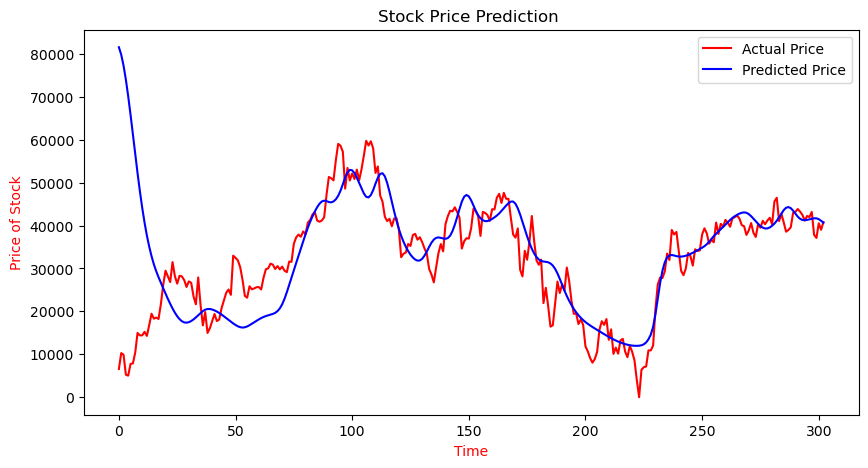

In [116]:
#plotting the Y_TEST AND Y_PRED
plt.figure(figsize = (10,5))
plt.plot(Y_TEST , color = "red" , label = "Actual Price")
plt.plot(Y_PRED , color = "blue", label = "Predicted Price")
plt.xlabel("Time", color = "red")
plt.ylabel("Price of Stock", color = "red")
plt.title("Stock Price Prediction ")
plt.legend()
plt.show()

In [124]:
dff = pd.DataFrame(Y_PRED)
dff.to_csv("predicted_file")